# Times, Periods and Time Series in Pandas


**Types of Time Related Data**

- Time date (Timestamp): a specific date and time with time zone - instant)
- Time delta (Timedelta): absolute durations of time
- Periods (Period): defined by a starting point and a frequency
- Durations that respect the calendar (DateOffsets)



In [70]:
import pandas as pd
import matplotlib.pyplot as plt

## Timestamp

### Method `pd.to_datetime(...)`

In [3]:
# Let's convert a date (by omission the format is the American one)
pd.to_datetime('04/05/2022',utc=True)

Timestamp('2022-04-05 00:00:00+0000', tz='UTC')

In [5]:
# Indicate that the days appear first
pd.to_datetime('04/05/2022',dayfirst=True,utc=True)

Timestamp('2022-05-04 00:00:00+0000', tz='UTC')

In [8]:
# Convert to the correct time zone
pd.to_datetime('04/05/2022',dayfirst=True,utc=True).tz_convert('Europe/Lisbon')

Timestamp('2022-05-04 01:00:00+0100', tz='Europe/Lisbon')

In [9]:
# You can also indicate the format
In [4]: pd.to_datetime('04/05/2022',format='%d/%m/%Y',utc=True).tz_convert('Europe/Lisbon')

Timestamp('2022-05-04 01:00:00+0100', tz='Europe/Lisbon')

#### Construction from a DataFrame

In [11]:
# We can create datetime from the columns of a Dataframe
df = pd.DataFrame(
    {"year": [2022, 2023], "month": [1, 1], "day": [2, 3], "hour": [0, 5]})
df

,year,month,day,hour
0,2022,1,2,0
1,2023,1,3,5


In [12]:
# We can now build a series (waits for at least columns year, month, day)
pd.to_datetime(df)


0   2022-01-02 00:00:00
1   2023-01-03 05:00:00
dtype: datetime64[ns]

### Create directly the Timestamp object

In [14]:
# Indicating the various components of the hour
pd.Timestamp(2022,4,5,0,0).tz_localize(tz='Europe/Lisbon')

Timestamp('2022-04-05 00:00:00+0100', tz='Europe/Lisbon')

In [15]:
# We can also pass a string
pd.Timestamp('2022-05-04')

Timestamp('2022-05-04 00:00:00')

In [16]:
# Get the current time
pd.Timestamp.now()

Timestamp('2022-10-15 10:24:00.418010')

### Method `pd.date_range(…)`

Allows you to create a range of consecutive dates (an index in reality...)

`pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, ...`

- periods: number of periods to generate
- freq: default ‘D’ (days); frequency strings can have multiples, e.g. ‘5H’.

See the [list of frequency aliases](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries-offset-aliases).

In [17]:
# Specify start and end, with the default daily frequency.
pd.date_range(start='1/1/2018', end='1/08/2018')

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# Specify start and periods, the number of periods (days)
pd.date_range(start='1/1/2018', periods=8)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08'],
              dtype='datetime64[ns]', freq='D')

In [20]:
# Specify end and periods, the number of periods (days).
pd.date_range(end='1/1/2018', periods=8)

DatetimeIndex(['2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30', '2017-12-31', '2018-01-01'],
              dtype='datetime64[ns]', freq='D')

In [21]:
#Specify start, end, and periods; the frequency is generated automatically (linearly spaced)
pd.date_range(start='2018-04-24', end='2018-04-27', periods=3)

DatetimeIndex(['2018-04-24 00:00:00', '2018-04-25 12:00:00',
               '2018-04-27 00:00:00'],
              dtype='datetime64[ns]', freq=None)

In [22]:
# The frequency by omission is daily
pd.date_range('2022-05-01','2022-05-31')

DatetimeIndex(['2022-05-01', '2022-05-02', '2022-05-03', '2022-05-04',
               '2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31'],
              dtype='datetime64[ns]', freq='D')

In [23]:
# Change the frequency to weekly
pd.date_range('2022-05-01','2022-05-31',freq='7D')

DatetimeIndex(['2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22',
               '2022-05-29'],
              dtype='datetime64[ns]', freq='7D')

In [24]:
# Weekly frequency starting on Monday
pd.date_range('2022-05-01','2022-05-31',freq='W-MON')

DatetimeIndex(['2022-05-02', '2022-05-09', '2022-05-16', '2022-05-23',
               '2022-05-30'],
              dtype='datetime64[ns]', freq='W-MON')

In [25]:
# Is there a way to generate only working days
pd.date_range('2022-05-01',periods=10,freq='B')

DatetimeIndex(['2022-05-02', '2022-05-03', '2022-05-04', '2022-05-05',
               '2022-05-06', '2022-05-09', '2022-05-10', '2022-05-11',
               '2022-05-12', '2022-05-13'],
              dtype='datetime64[ns]', freq='B')

## Time differences (time deltas)

- Represent differences between times (durations) in a given unit
- Methods `pd.to_timedelta(…)` and `pd.timedelta_range(…)` to create an element or an index
- They can be positive or negative and represent absolute durations
- Support arithmetic operations and indexing
- We can use the usual aggregation functions `min`, `max`, `sum`, `mean`, etc…
- The base frequency can also be shown and converted (see [documentation](https://pandas.pydata.org/docs/user_guide/timedeltas.html))

### Creation of time deltas

In [27]:
# the common way of getting  time deltas is the result from the difference between moments of time
pd.Timestamp.now() - pd.Timestamp('2022-09-12') # the begininf of the semester

Timedelta('33 days 11:05:02.011468')

In [28]:
# Creation of timedeltas explicitly
pd.to_timedelta('1 day')

Timedelta('1 days 00:00:00')

In [29]:
# With explicit indication of the unit
pd.to_timedelta(24,unit='hour')

Timedelta('1 days 00:00:00')

### Working with time deltas

In [34]:
# We can add and subtract timedeltas from timestamps
pd.Timestamp('2022-12-31 10:15:00') - pd.to_timedelta(5,unit='hour')

Timestamp('2022-12-31 05:15:00')

In [33]:
# We can also add/subtract timedeltas to each other
pd.to_timedelta('15 minutes') - pd.to_timedelta(5,unit='hour')

Timedelta('-1 days +19:15:00')

In [36]:
# Multiply (or divide) timedeltas by a constant
2*pd.to_timedelta('2 days 10 hours')

Timedelta('4 days 20:00:00')

In [37]:
# Divide timedeltas by timedeltas
pd.to_timedelta('1 day') / pd.to_timedelta('1 second')

86400.0

## Time Series

The following part is based on Section "Working with time series data" of Chapter 4 from the book "Hands-On Data Analysis with Pandas – Second Edition" by Stefanie Molin.

We will be working with the datasets:
- (CSV) Facebook's stock price daily throughout 2018 (obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis)).

The data has, for each day, for the Facebook's stock price, at open, close, the low and the high price and the volume.

We will read and add a new column 'trading_volume' that corresponds to 3 bins of volume

In [2]:
import numpy as np
import pandas as pd

fb = pd.read_csv('data/fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.tail(10)

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-17,143.08,144.92,138.4200,140.19,24333959,low
2018-12-18,141.08,145.93,139.8301,143.66,24709084,low
2018-12-19,141.21,144.91,132.5000,133.24,57404894,low
2018-12-20,130.70,135.57,130.0000,133.40,40297944,low
2018-12-21,133.39,134.90,123.4200,124.95,56901491,low
2018-12-24,123.10,129.74,123.0200,124.06,22066002,low
2018-12-26,126.00,134.24,125.8900,134.18,39723370,low
2018-12-27,132.44,134.99,129.6700,134.52,31202509,low
2018-12-28,135.34,135.92,132.2000,133.20,22627569,low


### Time-based selection and filtering

Remember, when we have an index of type `DatetimeIndex`, we can use datetime slicing. We can provide a range of dates.

The stock market is closed on the weekends.

#### Basic

In [39]:
fb['2018-10-11':'2018-10-15']
# 2018-10-13 and 2018-10-14 are weekend days

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.1600,153.35,35338901,low
2018-10-12,156.73,156.89,151.2998,153.74,25293492,low
2018-10-15,153.32,155.57,152.5500,153.52,15433521,low


In [190]:
# Date range can also be supplied using other frequencies.
# We can select ranges of months and quarters:
fb.loc['2018-Q1']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low
...,...,...,...,...,...,...
2018-03-23,165.44,167.10,159.0200,159.39,53609706,low
2018-03-26,160.82,161.10,149.0200,160.06,126116634,high
2018-03-27,156.31,162.85,150.7500,152.22,79116995,med


In [49]:
fb.loc['2018-01':'2018-03']
# Note that using loc[] is optional with ranges:
# fb['2018-01':'2018-03']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low
...,...,...,...,...,...,...
2018-03-23,165.44,167.10,159.0200,159.39,53609706,low
2018-03-26,160.82,161.10,149.0200,160.06,126116634,high
2018-03-27,156.31,162.85,150.7500,152.22,79116995,med


In [50]:
fb['2018-01':'2018-03'].equals(fb.loc['2018-01':'2018-03'])

True

When targeting the beginning or end of a date range, pandas has some additional methods for selecting the first or last rows within a specified unit of time.

The `first()` method will give us a specified length of time from the beginning of the time series.

In [53]:
fb.first('1W')
# Here, we ask for a week. January 1, 2018 was a holiday—meaning the market was closed. 
# It was also a Monday, so the week here is only four days:

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


In [195]:
fb.last('2W')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-24,123.10,129.74,123.02,124.06,22066002,low
2018-12-26,126.00,134.24,125.89,134.18,39723370,low
2018-12-27,132.44,134.99,129.67,134.52,31202509,low
2018-12-28,135.34,135.92,132.20,133.20,22627569,low
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


When working with daily stock data, we only have data for the dates the stock market was open. Suppose that we reindexed the data to include rows for each day of the year.

In [201]:
# Suppose that we reindexed the Facebook stock data to include all dates for 2018. 
# We would have null entries for January 1st:
fb_reindexed = fb.reindex(pd.date_range('2018-01-01', '2018-12-31', freq='D'))
fb_reindexed

,open,high,low,close,volume,trading_volume
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,177.68,181.58,177.5500,181.42,18151903.0,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563.0,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896.0,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535.0,low
...,...,...,...,...,...,...
2018-12-27,132.44,134.99,129.6700,134.52,31202509.0,low
2018-12-28,135.34,135.92,132.2000,133.20,22627569.0,low
2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'The original data')

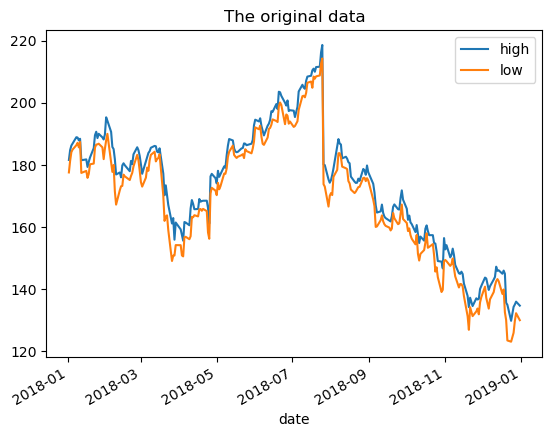

In [199]:
fb[['high', 'low']].plot().set_title('The original data')

Text(0.5, 1.0, 'The reindexed data')

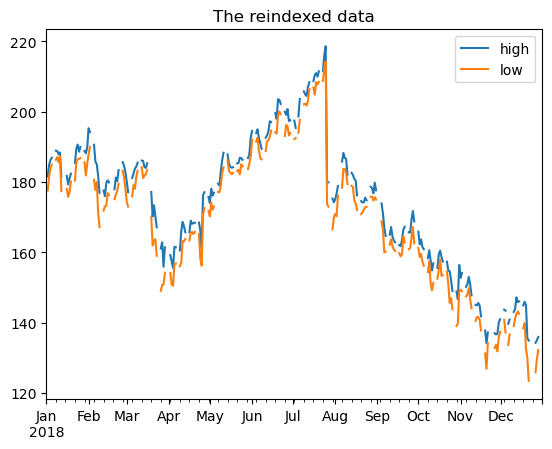

In [87]:
fb_reindexed[['high', 'low']].plot().set_title('The reindexed data')
# the null values are visilble !

#### Get valid indexes

In [203]:
# show the first few days of March on the reindexed
fb_reindexed['2018-03-01':'2018-03-05']

,open,high,low,close,volume,trading_volume
2018-03-01,179.01,180.1200,174.41,175.94,23201626.0,low
2018-03-02,173.29,177.1100,172.99,176.62,20025905.0,low
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,176.20,181.1475,175.89,180.40,16189280.0,low


In [204]:
# show the first few days of the series on the reindexed
fb_reindexed['2018-01-01':'2018-01-05']

,open,high,low,close,volume,trading_volume
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,177.68,181.58,177.5500,181.42,18151903.0,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563.0,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896.0,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535.0,low


We can use `first_valid_index()` to give us the index of the first non-null entry in our data, which is the first day the market was open in Q1 2018:

In [105]:
fb_reindexed.loc['2018-Q1'].first_valid_index()

Timestamp('2018-01-02 00:00:00', freq='D')

In [102]:
# show the last few days of March on the reindexed
fb_reindexed['2018-03-27':'2018-03-31']

,open,high,low,close,volume,trading_volume
2018-03-27,156.31,162.85,150.75,152.22,79116995.0,med
2018-03-28,151.65,155.88,150.80,153.03,60029170.0,low
2018-03-29,155.15,161.42,154.14,159.79,59434293.0,low
2018-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN


Conversely, we can use `last_valid_index()` to get the last entry of non-null data. For Q1 2018, this is March 29th:

In [107]:
fb_reindexed.loc['2018-Q1'].last_valid_index()

Timestamp('2018-03-29 00:00:00', freq='D')

We can use `asof()` to find the last non-null data before the point we are looking for. If we ask for March 31st, we will get the data from the index we got from `fb_reindexed.loc['2018-Q1'].last_valid_index()`, which was March 29th. Note that this works regardless of whether we reindexed:

In [108]:
fb_reindexed.asof('2018-03-31')

open                  155.15
high                  161.42
low                   154.14
close                 159.79
volume            59434293.0
trading_volume           low
Name: 2018-03-31 00:00:00, dtype: object

#### Changing the level of granularity

For the next few examples, we will need time information in addition to the date. The datasets we have been working with thus far lack a time component, so we will switch to the Facebook stock data by the minute from **May 20, 2019** through **May 24, 2019** from Nasdaq.com. 

In order to properly parse the datetimes, **we need to pass in a lambda function as the date_parser argument since they are not in a standard format** (for instance, May 20, 2019 at 9:30 AM is represented as 2019-05-20 09-30); the lambda function will specify how to convert the data in the date field into datetimes

Check more on [available codes](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior)

In [3]:
stock_data_per_minute = pd.read_csv(
    'data/fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True, 
    date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
)

stock_data_per_minute.head(20)
# now we have the data atgranularity level of minute 

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0
2019-05-20 09:35:00,183.0500,183.0500,183.0500,183.0500,68116.0
2019-05-20 09:36:00,182.6000,182.6000,182.6000,182.6000,62710.0
2019-05-20 09:37:00,182.4000,182.4000,182.4000,182.4000,49433.0
2019-05-20 09:38:00,182.2500,182.2500,182.2500,182.2500,52004.0


We can use a `Grouper` object to roll up our data to the daily level along with `first` and `last`:
To get the **open price** of the day we have to aggregate with `fisrt` and with `last` for the **close**; 
To get the **high price** of the day we have to aggregate with `max` and with `min` for the **low**;
To get the total volume wee need to sum.

In [4]:
# Rolling up the data from the minute level to the daily level
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open': 'first',
    'high': 'max', 
    'low': 'min', 
    'close': 'last', 
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


#### Select data based on the time part of the datetime.
The at_time() method allows us to isolate rows where the time part of the datetime is the time we specify. By running at_time('9:30'), we can grab all the market open prices (the stock market opens at 9:30 AM):

In [4]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.0
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.0
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.0
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.0


We can use the between_time() method to grab all the rows where the time portion of the datetime is between two times (inclusive of the endpoints by default).

In [5]:
# Let's grab all the rows within the last two minutes of trading each day (15:59 - 16:00):
stock_data_per_minute.between_time('15:59', '16:00')

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.915,182.915,182.915,182.915,134569.0
2019-05-20 16:00:00,182.720,182.720,182.720,182.720,1113672.0
2019-05-21 15:59:00,184.840,184.840,184.840,184.840,61606.0
2019-05-21 16:00:00,184.820,184.820,184.820,184.820,801080.0
2019-05-22 15:59:00,185.290,185.290,185.290,185.290,96099.0
2019-05-22 16:00:00,185.320,185.320,185.320,185.320,1220993.0
2019-05-23 15:59:00,180.720,180.720,180.720,180.720,109648.0
2019-05-23 16:00:00,180.870,180.870,180.870,180.870,1329217.0
2019-05-24 15:59:00,181.070,181.070,181.070,181.070,52994.0


#### Combing operations:  `between_time()` with `group_by()`

**On average, are more shares traded within the first 30 minutes of trading or in the last 30 minutes?**

We can combine `between_time()` with `group_by()` to answer this question. 

For the week in question, more are traded on average around opening time than closing time.

<AxesSubplot:xlabel='date'>

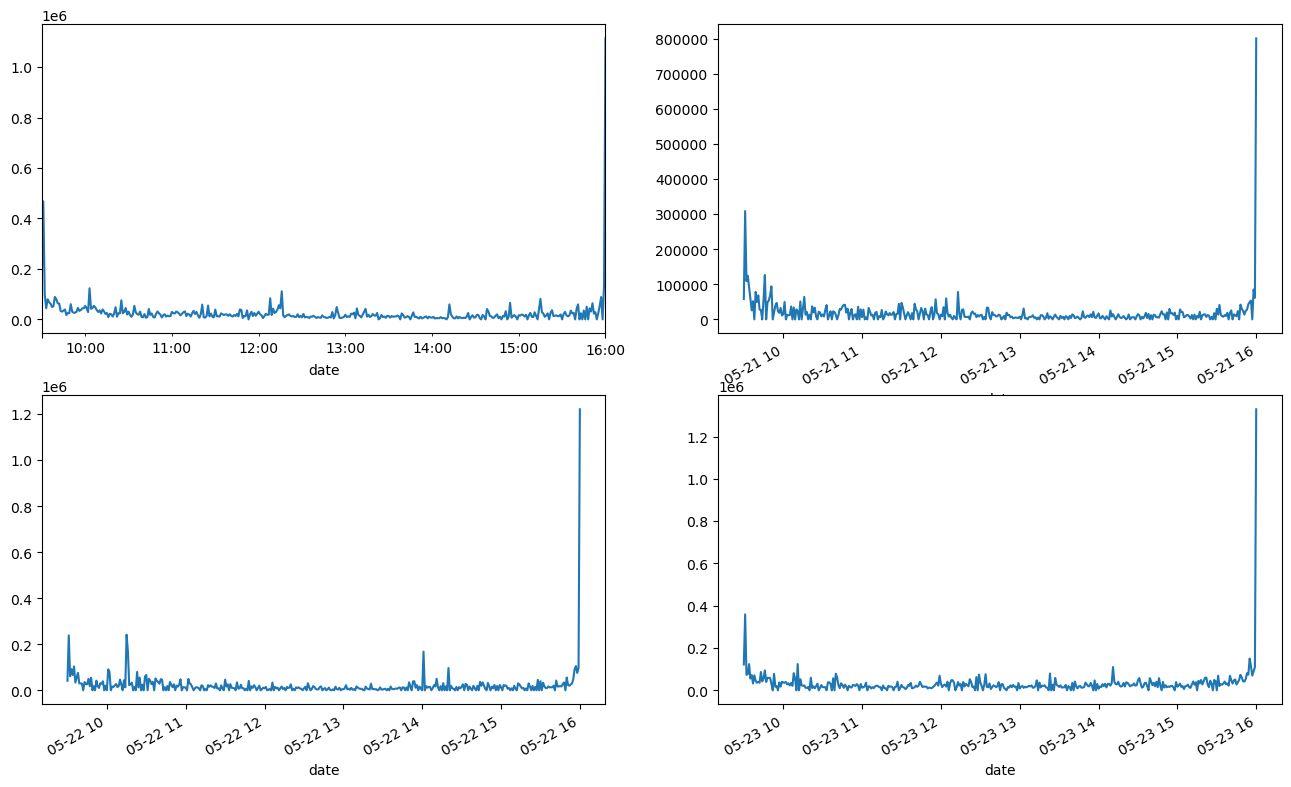

In [117]:
# Lets take a look at volume during a day
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))

ax1 = plt.subplot(2, 2, 1)
stock_data_per_minute['volume']['2019-05-20'].plot()

ax2 = plt.subplot(2, 2, 2)
stock_data_per_minute['volume']['2019-05-21'].plot()

ax3 = plt.subplot(2, 2, 3)
stock_data_per_minute['volume']['2019-05-22'].plot()

ax4 = plt.subplot(2, 2, 4)
stock_data_per_minute['volume']['2019-05-23'].plot()

In [77]:
# first 30 mins of the day '2019-05-20': between_time('9:30', '10:00')
shares_traded_in_first_30_min = stock_data_per_minute\
    .between_time('9:30', '10:00')

shares_traded_in_first_30_min

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0
...,...,...,...,...,...
2019-05-24 09:56:00,182.9200,182.9200,182.9200,182.9200,53042.0
2019-05-24 09:57:00,182.9200,182.9200,182.9200,182.9200,0.0
2019-05-24 09:58:00,182.8950,182.8950,182.8950,182.8950,64976.0


In [97]:
# For each day compute the average volume on the first 30 mins of the day
shares_traded_in_first_30_min_grouped_by = stock_data_per_minute\
    .between_time('9:30', '10:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .volume.mean()

shares_traded_in_first_30_min_grouped_by

date
2019-05-20    64934.258065
2019-05-21    54686.966667
2019-05-22    40722.933333
2019-05-23    61755.033333
2019-05-24    55541.100000
Freq: D, Name: volume, dtype: float64

In [98]:
# For each day compute the average volume on the last 30 mins of the day
shares_traded_in_last_30_min_grouped_by = stock_data_per_minute\
    .between_time('15:30', '16:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .volume.mean()

shares_traded_in_last_30_min_grouped_by

date
2019-05-20    64312.838710
2019-05-21    48881.064516
2019-05-22    69281.677419
2019-05-23    95102.967742
2019-05-24    46341.290323
Freq: D, Name: volume, dtype: float64

In [99]:
# For each day compute the diference betwwen the volume on the first 30 mins and on the last 30 mins of the day
shares_traded_in_first_30_min_grouped_by - shares_traded_in_last_30_min_grouped_by

date
2019-05-20      621.419355
2019-05-21     5805.902151
2019-05-22   -28558.744086
2019-05-23   -33347.934409
2019-05-24     9199.809677
Freq: D, Name: volume, dtype: float64

In [100]:
# now the average for all days
(shares_traded_in_first_30_min_grouped_by - shares_traded_in_last_30_min_grouped_by).mean()

-9255.90946236559

### Shifting for lagged data
Notice: in this examples we are using againg the original dataset where the data has, for each day, for the Facebook's stock price, at open, close, the low and the high price and the volume.

In [151]:
fb

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low
...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,low
2018-12-26,126.00,134.24,125.8900,134.18,39723370,low
2018-12-27,132.44,134.99,129.6700,134.52,31202509,low


We can use `shift()` to create lagged data. By default, the shift will be one period. For example, we can use `shift()` to create a new column that indicates the previous day's closing price. From this new column, we can calculate the price change due to after-hours trading (after the close one day right up to the open the following day):

In [14]:
fb_extended = fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
)
fb_extended

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low,NaN,NaN,NaN
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low,181.42,0.46,0.46
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low,184.67,0.23,0.23
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low,184.33,1.26,1.26
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low,186.85,0.35,0.35
...,...,...,...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,low,124.95,-1.85,1.85
2018-12-26,126.00,134.24,125.8900,134.18,39723370,low,124.06,1.94,1.94
2018-12-27,132.44,134.99,129.6700,134.52,31202509,low,134.18,-1.74,1.74


In [13]:
fb_extended.nlargest(5, 'abs_change')
# we are selecting the n largest entries by the column 'abs_change'

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


### Differenced data
Using the `diff()` method is a quick way to calculate the difference between the data and a lagged version of itself. By default, it will yield the result of `data - data.shift()`:

In [15]:
(fb[['volume']] - fb[['volume']].shift()).equals(fb[['volume']].diff())

True

We can specify the number of periods, can be any positive or negative integer:

In [162]:
fb[['volume']].diff(-3)

,volume
date,
2018-01-02,4577368.0
2018-01-03,-1108163.0
2018-01-04,1487839.0
2018-01-05,3044641.0
2018-01-08,8406139.0
...,...
2018-12-24,-561567.0
2018-12-26,15098062.0
2018-12-27,NaN


In [17]:
# if we want to aplly the difference to all columns we have to remove the 'trading_volume' column
# since is not a numerical one
fb.drop(columns='trading_volume').diff(2).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN
2018-01-04,7.22,4.63,6.5496,2.91,-4271007.0
2018-01-05,3.71,2.12,3.6000,2.18,-3312028.0
2018-01-08,2.30,2.69,2.2304,3.95,4113830.0


### Resampling

Sometimes, the data is at a granularity that isn't conducive to our analysis. Consider the case where we have data per minute for the full year of 2018. The level of granularity and nature of the data may render plotting useless. Therefore, we will need to aggregate the data to a less granular frequency.

Resampling refers to the process of converting a time series from one frequency to another. Aggregating higher frequency data to lower frequency is called *downsampling*, while converting lower frequency to higher frequency is called *upsampling*.

`resample` has a similar API to `groupby`; you call `resample` to group the data, then call an aggregation function:

#### Downsampling

In [168]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


We can resample (in this case downsampling) this to get to a daily frequency:

In [172]:
stock_data_per_day = stock_data_per_minute.resample('1D').agg({
    'open': 'first',
    'high': 'max', 
    'low': 'min', 
    'close': 'last', 
    'volume': 'sum'
})

stock_data_per_day

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


Now consider again the data `fb` with the data at day level. We can downsample to quarterly data:

In [175]:
fb.resample('Q').mean()

,open,high,low,close,volume
date,,,,,
2018-03-31,179.472295,181.794659,177.040428,179.551148,3.292640e+07
2018-06-30,180.373770,182.277689,178.595964,180.704688,2.405532e+07
2018-09-30,180.812130,182.890886,178.955229,181.028492,2.701982e+07
2018-12-31,145.272460,147.620121,142.718943,144.868730,2.697433e+07


Consider the following melted stock data by the minute. We don't see the OHLC (Open, High, Low, Close) data directly:

In [176]:
melted_stock_data = pd.read_csv('data/melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


We can use the [`ohlc()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.ohlc.html) method after resampling to recover the OHLC columns:

In [181]:
stock_data_per_day = melted_stock_data.resample('1D').ohlc()['price']
stock_data_per_day

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


#### Upsampling

Converting lower frequency to higher frequency

Check the method [`asfreq`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.asfreq.html)

In [18]:
# we can upsample to increase the granularity. 
# Note this will introduce `NaN` values:
# the 'fb' data is by day
fb.asfreq('6H')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low
...,...,...,...,...,...,...
2018-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-30 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN


There are many ways to handle these `NaN` values. We can forward-fill with [`pad()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pad.html) or using the [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [186]:
fb.asfreq('6H').pad()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 12:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 18:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low
...,...,...,...,...,...,...
2018-12-30 00:00:00,135.34,135.92,132.20,133.20,22627569.0,low
2018-12-30 06:00:00,135.34,135.92,132.20,133.20,22627569.0,low
2018-12-30 12:00:00,135.34,135.92,132.20,133.20,22627569.0,low


In [187]:
fb.resample('6H').fillna('nearest')

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-02 18:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low
...,...,...,...,...,...,...
2018-12-30 00:00:00,134.45,134.64,129.95,131.09,24625308,low
2018-12-30 06:00:00,134.45,134.64,129.95,131.09,24625308,low
2018-12-30 12:00:00,134.45,134.64,129.95,131.09,24625308,low


### Moving Window Functions

Lets setup the data for the examples.

In [30]:
close_px_all = pd.read_csv('data/stock_px.csv', index_col=0, parse_dates=True)

In [31]:
# get only the columns for APPL, MSFT and XOM
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


<AxesSubplot:>

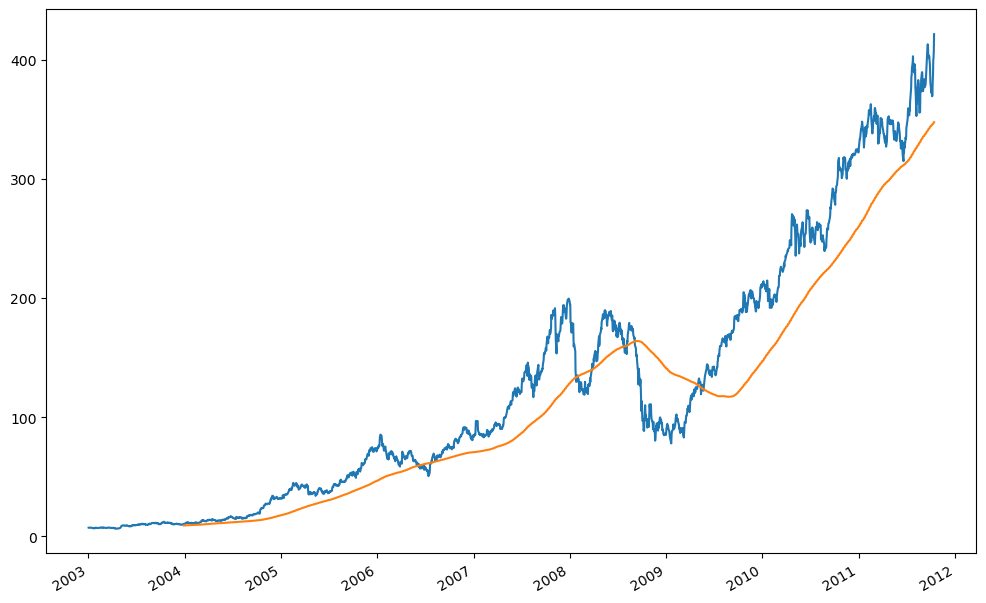

In [74]:
# plot the price of APPL and the 250-day moving window average of Apple’s stock price.
plt.figure(figsize=(12,8))

close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

<AxesSubplot:>

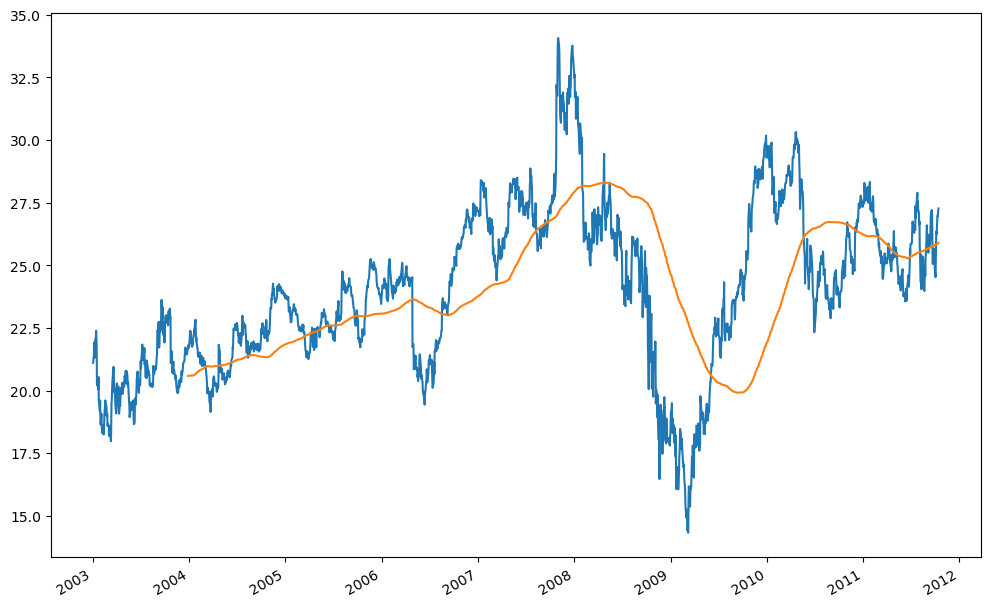

In [75]:
# plot the price of MSFT and the 250-day moving window average of Apple’s stock price.
plt.figure(figsize=(12,8))

close_px.MSFT.plot()
close_px.MSFT.rolling(250).mean().plot()

#### Covid Data Example

##### Reading and ploting the data

The data goes from jan 2020 until october 2022. 1016 rows 

In [62]:
covid_pt = pd.read_csv('data/covid-pt.csv', parse_dates=True, index_col=0)
covid_pt

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2020-01-03,0,0,0,0
2020-01-04,0,0,0,0
2020-01-05,0,0,0,0
2020-01-06,0,0,0,0
2020-01-07,0,0,0,0
...,...,...,...,...
2022-10-10,726,5503688,6,25096
2022-10-11,414,5504102,7,25103
2022-10-12,1552,5505654,3,25106


<AxesSubplot:xlabel='Date_reported'>

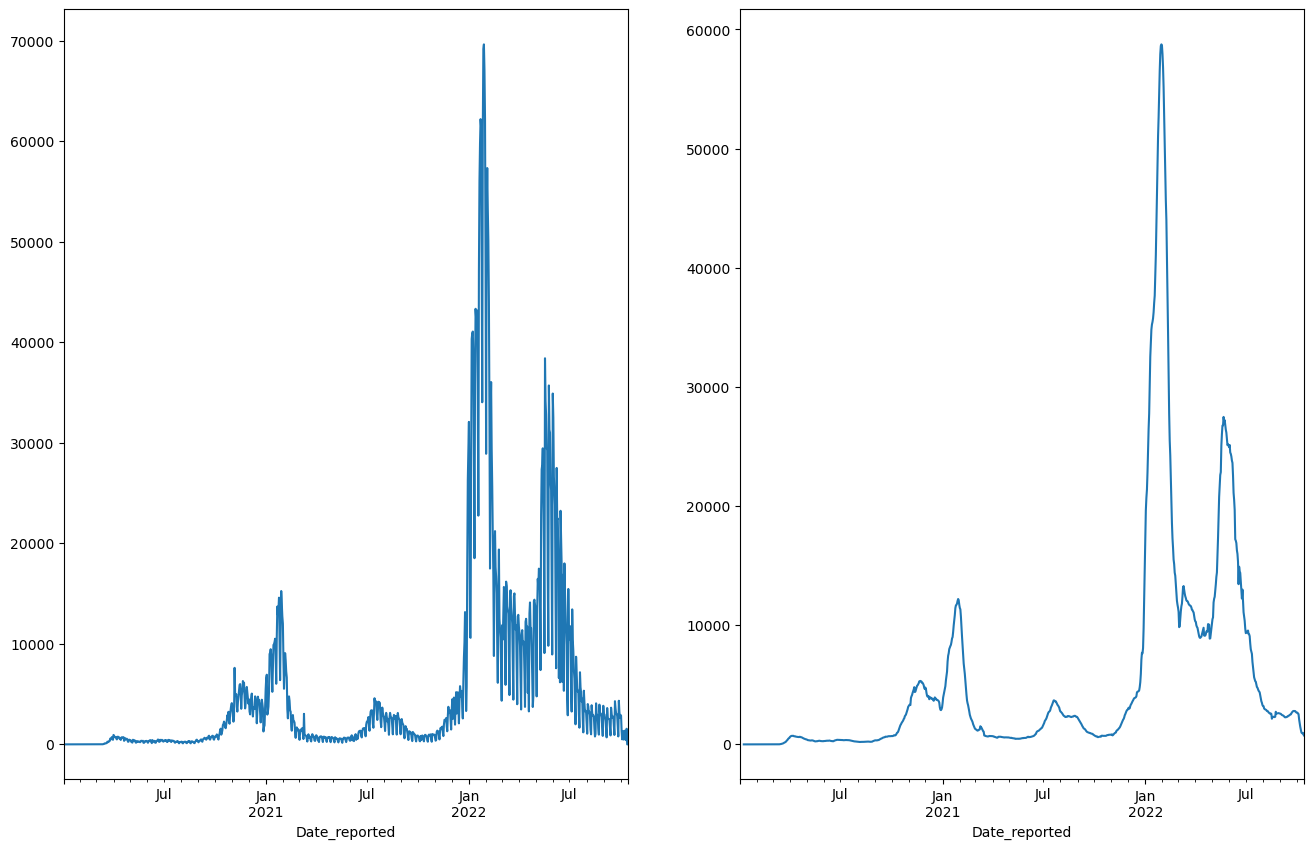

In [84]:
# PLotting the New Cases
plt.figure(figsize=(16,10))

ax1 = plt.subplot(1, 2, 1)
covid_pt['New_cases'].plot()

ax1 = plt.subplot(1, 2, 2)
covid_pt['New_cases'].rolling(7).mean().plot()

<AxesSubplot:xlabel='Date_reported'>

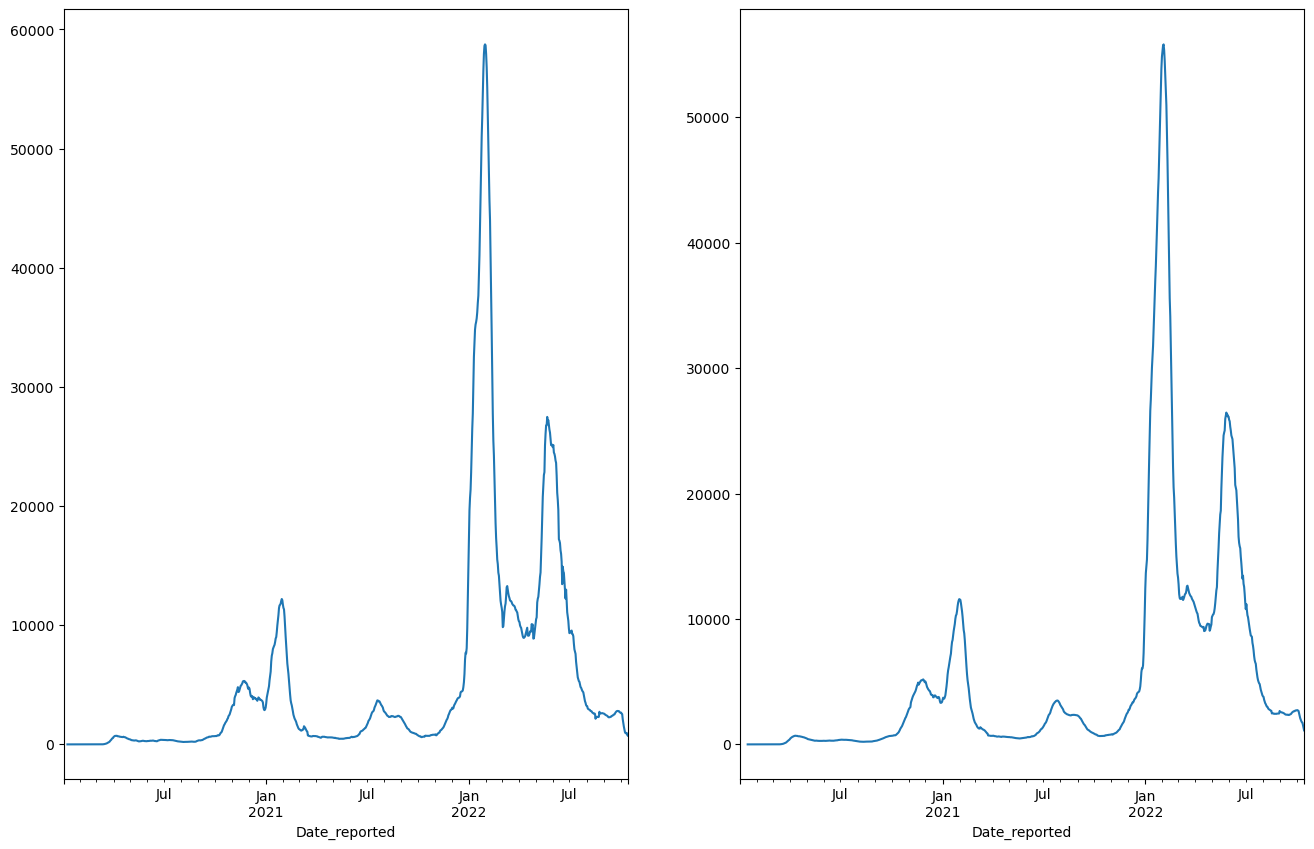

In [85]:
# PLotting the New Cases
plt.figure(figsize=(16,10))

ax1 = plt.subplot(1, 2, 1)
covid_pt['New_cases'].rolling(7).mean().plot()

ax1 = plt.subplot(1, 2, 2)
covid_pt['New_cases'].rolling(14).mean().plot()

<AxesSubplot:xlabel='Date_reported'>

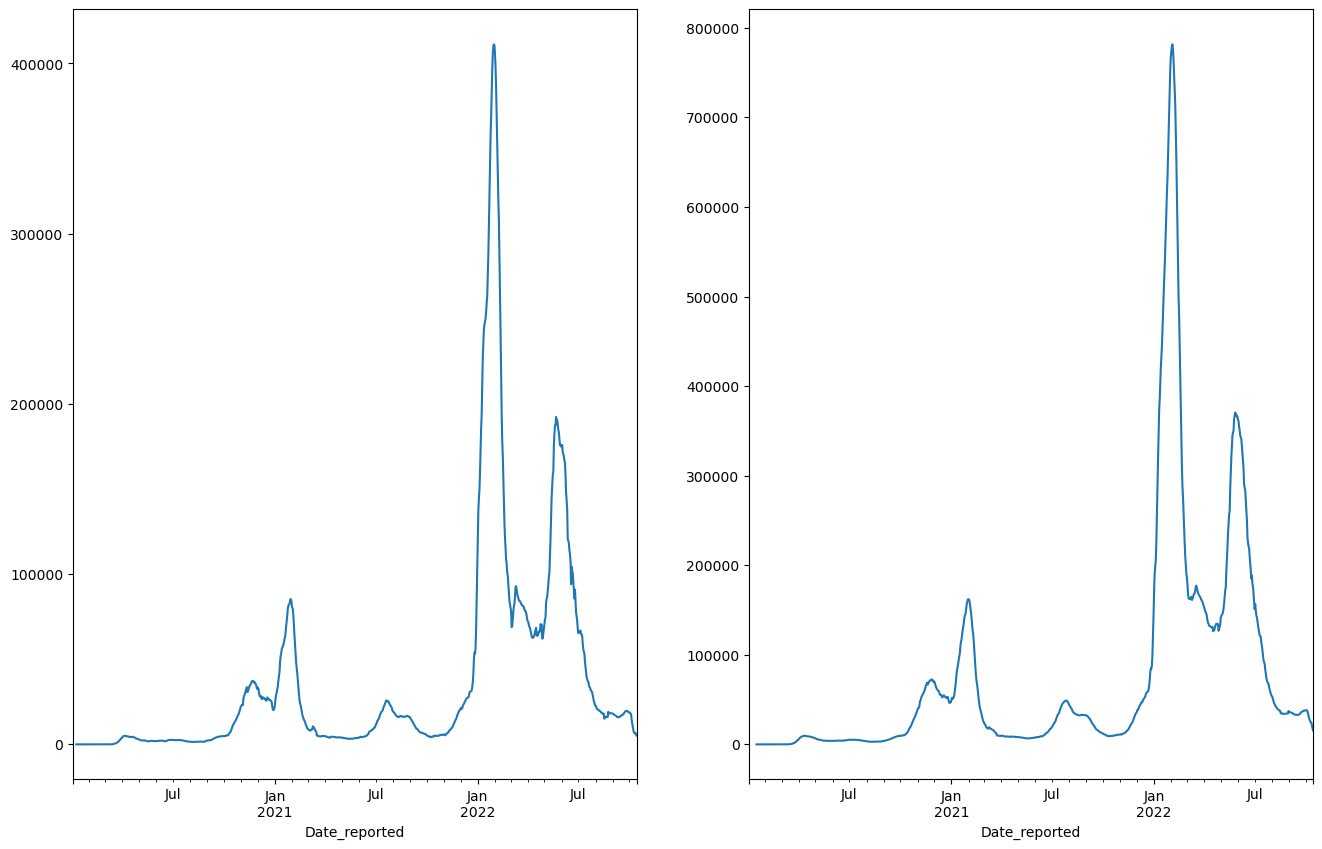

In [86]:
# PLotting the New Cases using SUM aggregation 
plt.figure(figsize=(16,10))

ax1 = plt.subplot(1, 2, 1)
covid_pt['New_cases'].rolling(7).sum().plot()

ax1 = plt.subplot(1, 2, 2)
covid_pt['New_cases'].rolling(14).sum().plot()

# notice the diference on scale

<AxesSubplot:>

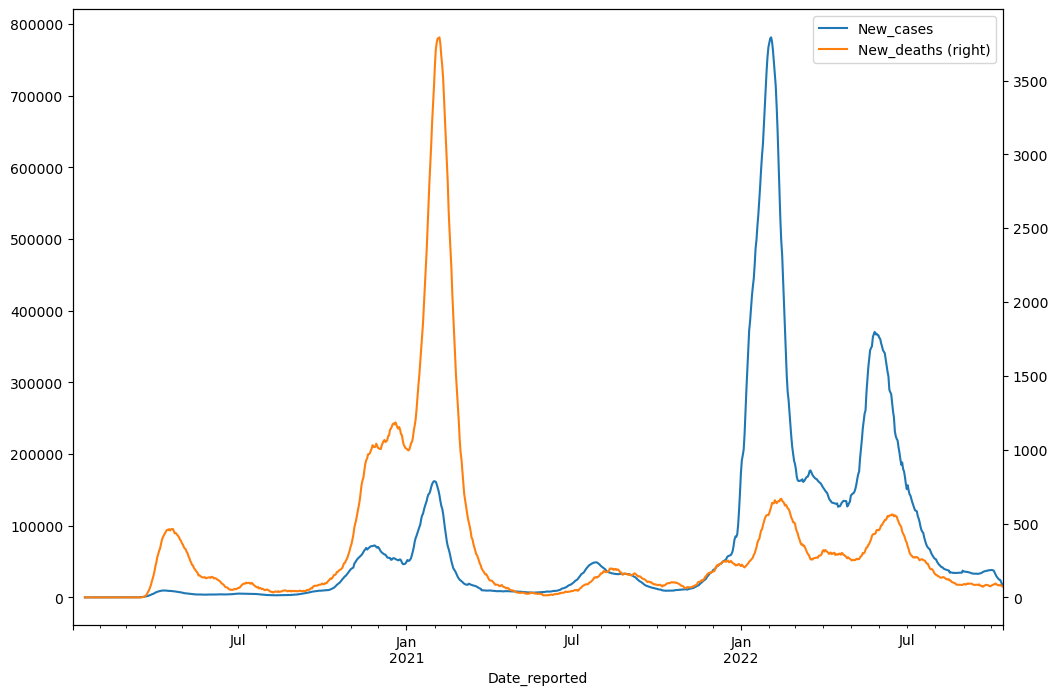

In [94]:
# Plotting the acumulated new cases and new deaths over a period of 14 days
plt.figure(figsize=(12,8))

covid_pt['New_cases'].rolling(14).sum().plot(legend=True)
covid_pt['New_deaths'].rolling(14).sum().plot(secondary_y=True, legend=True)

##### More about the rolling windows

In [107]:
# Lets consider only data from 2022
covid_pt_2022 = covid_pt.loc['2022']
covid_pt_2022

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2022-01-01,32075,1391621,17,18951
2022-01-02,22808,1414429,23,18974
2022-01-03,10656,1425085,16,18990
2022-01-04,10597,1435682,13,19003
2022-01-05,27992,1463674,12,19015
...,...,...,...,...
2022-10-10,726,5503688,6,25096
2022-10-11,414,5504102,7,25103
2022-10-12,1552,5505654,3,25106


In [103]:
# the basic version
covid_pt_2022['New_cases'].rolling(7).mean().head(10)

Date_reported
2022-01-01             NaN
2022-01-02             NaN
2022-01-03             NaN
2022-01-04             NaN
2022-01-05             NaN
2022-01-06             NaN
2022-01-07    26476.571429
2022-01-08    27760.000000
2022-01-09    30014.142857
2022-01-10    32530.714286
Name: New_cases, dtype: float64

In [102]:
# the basic version is equivalent to setting min_periods = window
covid_pt_2022['New_cases'].rolling(window=7, min_periods=7).mean().head(10)

Date_reported
2022-01-01             NaN
2022-01-02             NaN
2022-01-03             NaN
2022-01-04             NaN
2022-01-05             NaN
2022-01-06             NaN
2022-01-07    26476.571429
2022-01-08    27760.000000
2022-01-09    30014.142857
2022-01-10    32530.714286
Name: New_cases, dtype: float64

In [108]:
# the impact of changing the min_periods to a smaller value
covid_pt_2022['New_cases'].rolling(window=7, min_periods=3).mean().head(10)

Date_reported
2022-01-01             NaN
2022-01-02             NaN
2022-01-03    21846.333333
2022-01-04    19034.000000
2022-01-05    20825.600000
2022-01-06    24075.166667
2022-01-07    26476.571429
2022-01-08    27760.000000
2022-01-09    30014.142857
2022-01-10    32530.714286
Name: New_cases, dtype: float64

In [111]:
# the two first values are summing less numbers ! Sum is note apppropriate
covid_pt_2022['New_cases'].rolling(window=7, min_periods=3).sum().head(10)

Date_reported
2022-01-01         NaN
2022-01-02         NaN
2022-01-03     65539.0
2022-01-04     76136.0
2022-01-05    104128.0
2022-01-06    144451.0
2022-01-07    185336.0
2022-01-08    194320.0
2022-01-09    210099.0
2022-01-10    227715.0
Name: New_cases, dtype: float64

In [112]:
# the window is now centered on the current value
covid_pt_2022['New_cases'].rolling(window=7, center=True).mean().head(10)

Date_reported
2022-01-01             NaN
2022-01-02             NaN
2022-01-03             NaN
2022-01-04    26476.571429
2022-01-05    27760.000000
2022-01-06    30014.142857
2022-01-07    32530.714286
2022-01-08    33662.000000
2022-01-09    34808.428571
2022-01-10    35237.000000
Name: New_cases, dtype: float64

In [115]:
# the window defined using duration the Minimum number of observations is equal to 1 
covid_pt_2022['New_cases'].rolling(window='7D').mean().head(10)
# covid_pt_2022['New_cases'].rolling(window='7D', min_periods = 1).mean().head(10)

Date_reported
2022-01-01    32075.000000
2022-01-02    27441.500000
2022-01-03    21846.333333
2022-01-04    19034.000000
2022-01-05    20825.600000
2022-01-06    24075.166667
2022-01-07    26476.571429
2022-01-08    27760.000000
2022-01-09    30014.142857
2022-01-10    32530.714286
Name: New_cases, dtype: float64

##### The impact of missing values on rolling windows operations

In [118]:
covid_pt_missing_some_data = covid_pt_2022.query(" Date_reported >= '2022-01-01' and Date_reported < '2022-02-01' or Date_reported > '2022-02-10'")
covid_pt_missing_some_data

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2022-01-01,32075,1391621,17,18951
2022-01-02,22808,1414429,23,18974
2022-01-03,10656,1425085,16,18990
2022-01-04,10597,1435682,13,19003
2022-01-05,27992,1463674,12,19015
...,...,...,...,...
2022-10-10,726,5503688,6,25096
2022-10-11,414,5504102,7,25103
2022-10-12,1552,5505654,3,25106


<AxesSubplot:xlabel='Date_reported'>

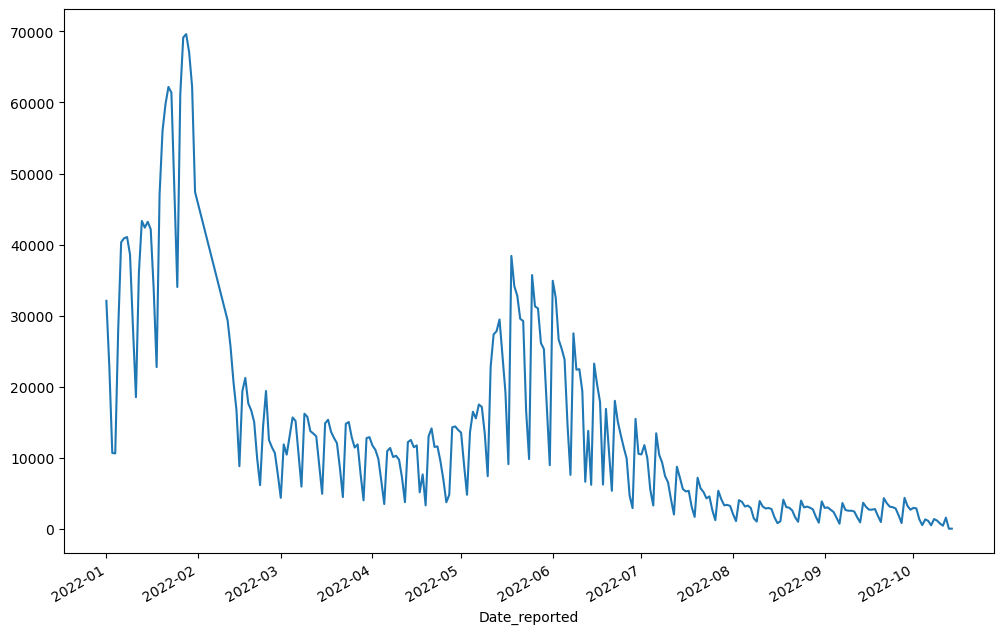

In [138]:
plt.figure(figsize=(12,8))
covid_pt_missing_some_data['New_cases'].plot()

In [122]:
covid_pt_missing_some_data.loc['2022-01-31':]

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,
2022-01-31,47399,2679934,35,19865
2022-02-11,29346,3114901,42,20403
2022-02-12,25631,3140532,42,20445
2022-02-13,20654,3161186,50,20495
2022-02-14,16742,3177928,38,20533
...,...,...,...,...
2022-10-10,726,5503688,6,25096
2022-10-11,414,5504102,7,25103
2022-10-12,1552,5505654,3,25106


<AxesSubplot:title={'center':'Missing - window = 7'}, xlabel='Date_reported'>

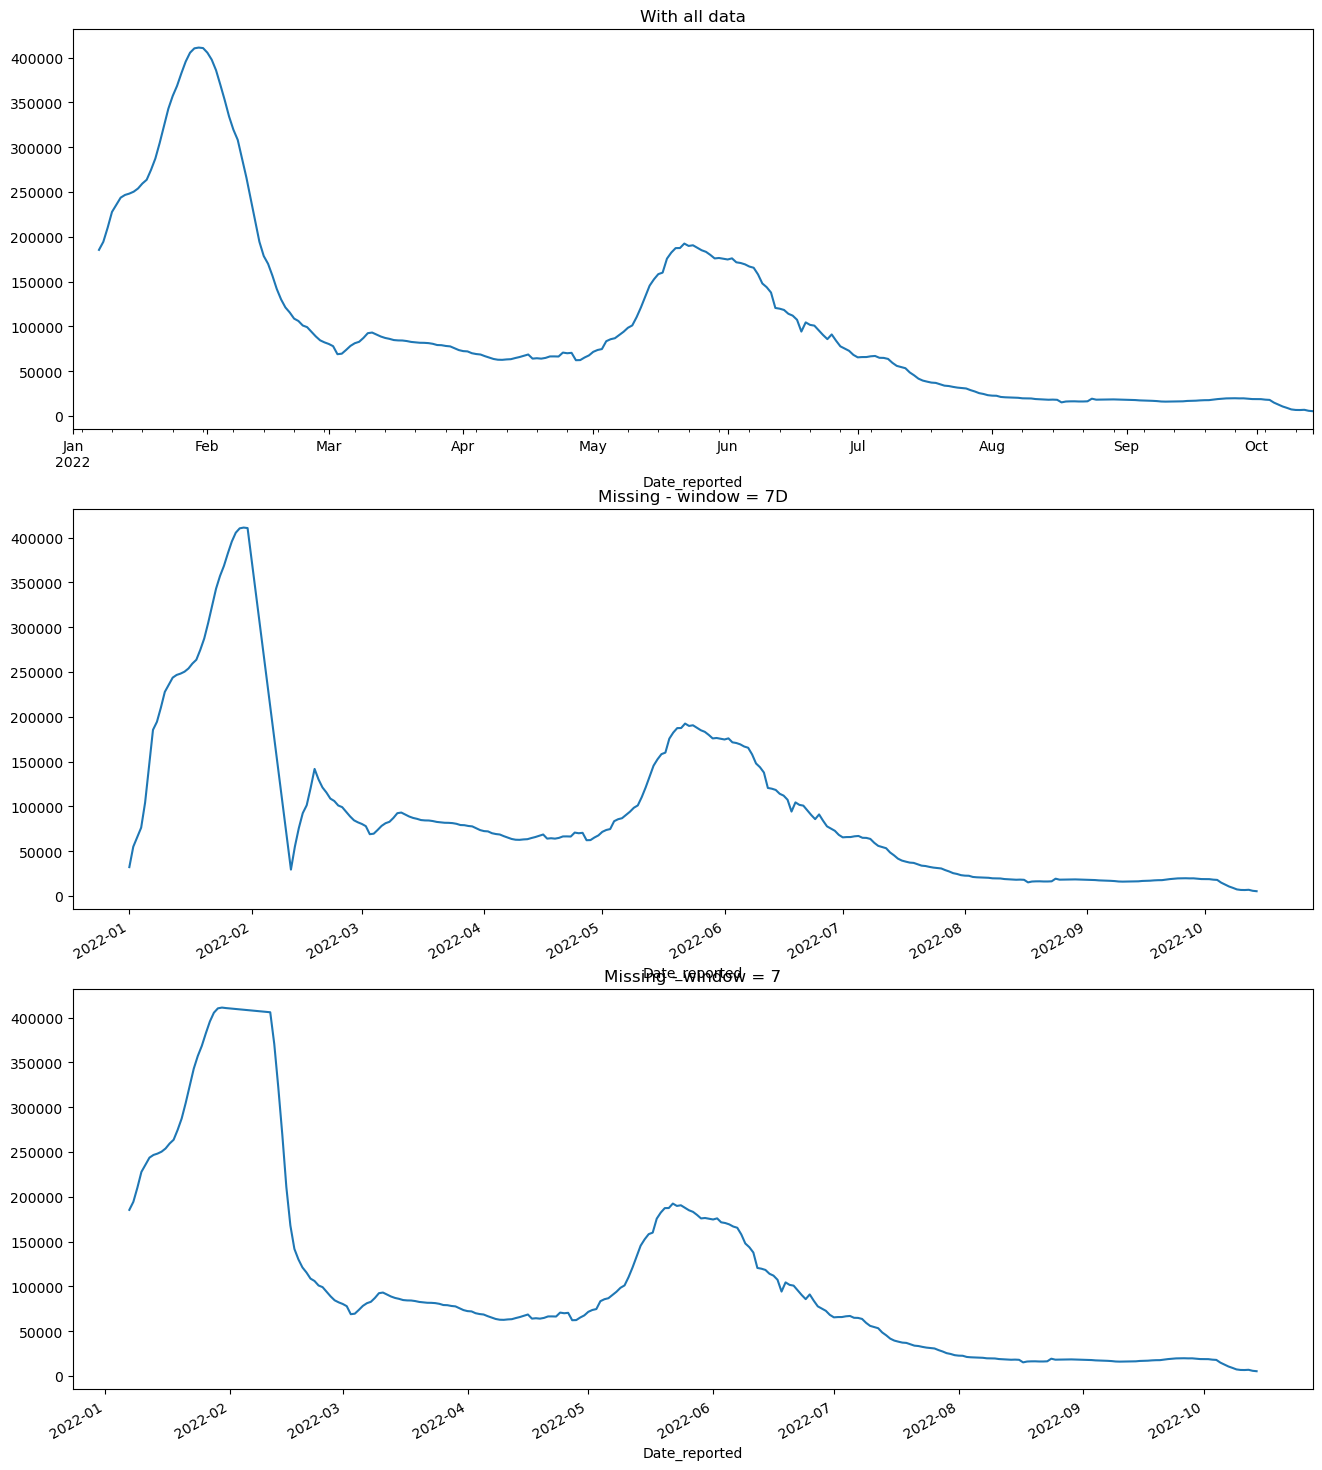

In [135]:
plt.figure(figsize=(16,20))

ax1 = plt.subplot(3, 1, 1)
covid_pt_2022['New_cases'].rolling(7).sum().plot(title='With all data')

ax2 = plt.subplot(3, 1, 2)
covid_pt_missing_some_data['New_cases'].rolling('7D').sum().plot(title='Missing - window = 7D')

ax3 = plt.subplot(3, 1, 3)
covid_pt_missing_some_data['New_cases'].rolling(7).sum().plot(title='Missing - window = 7')

<AxesSubplot:title={'center':'Missing - window = 7'}, xlabel='Date_reported'>

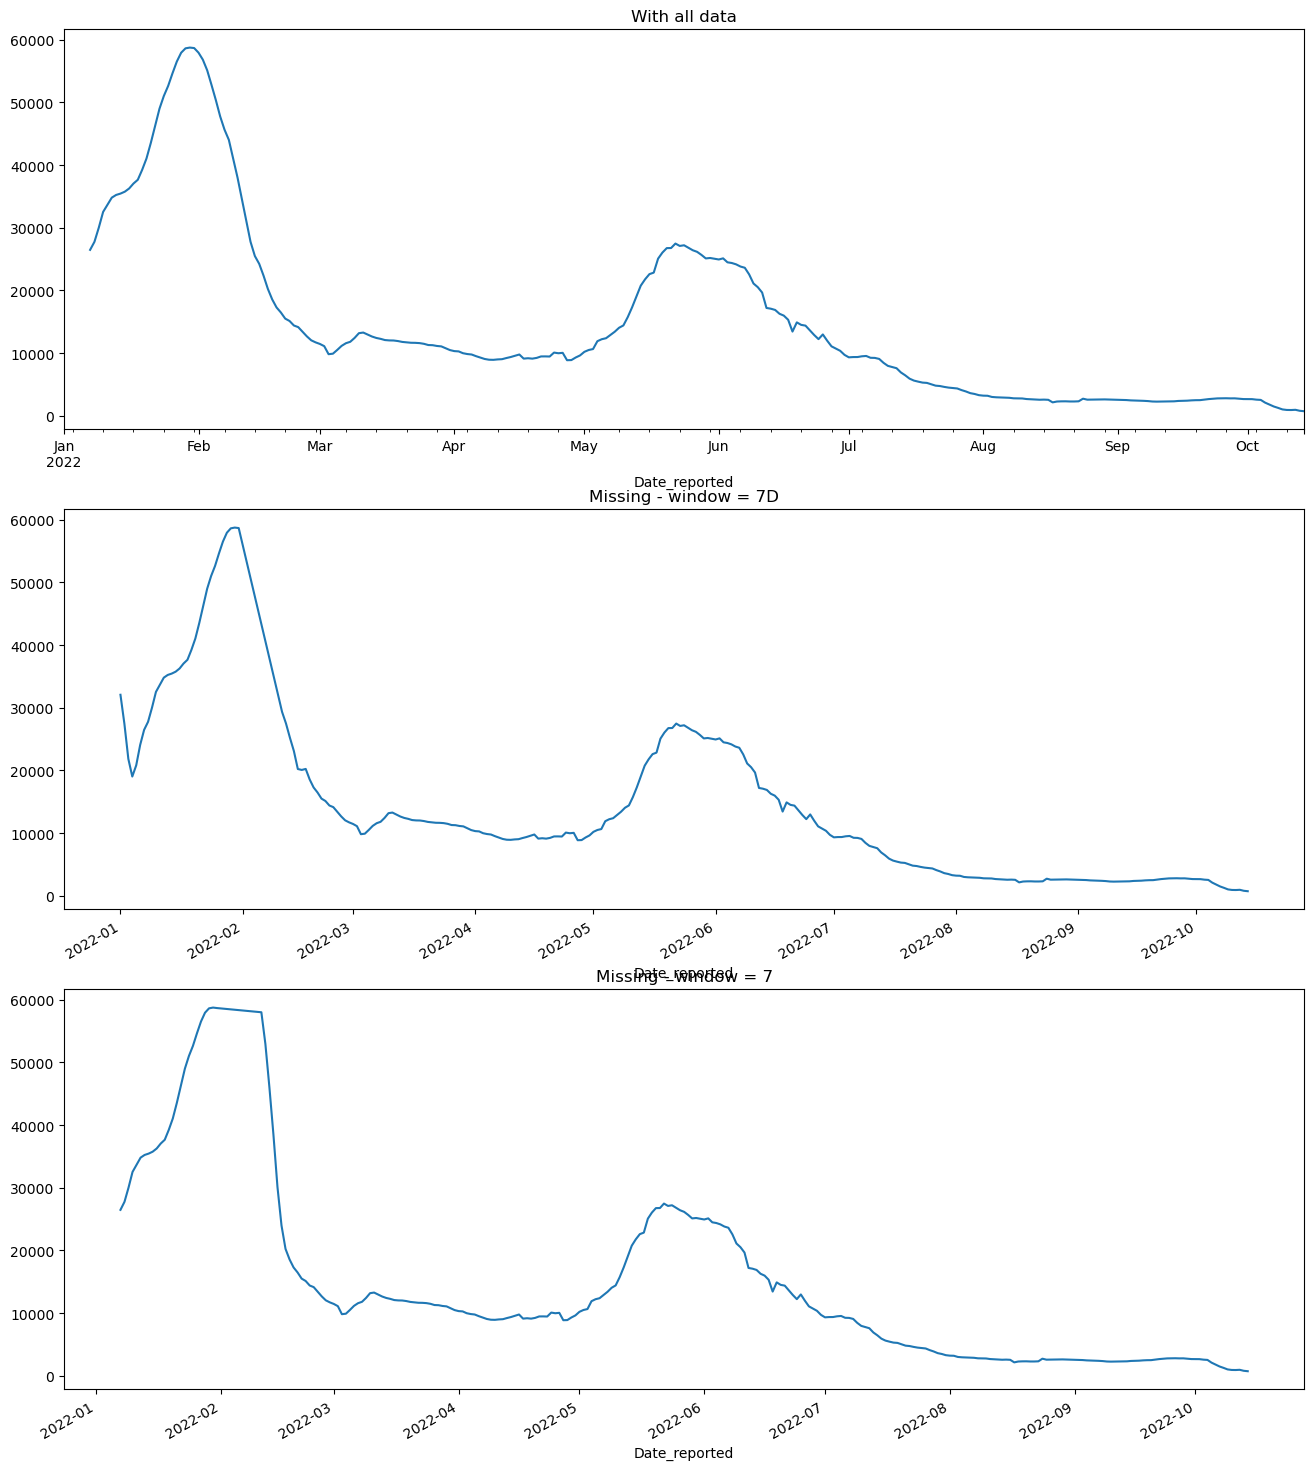

In [139]:
plt.figure(figsize=(16,20))

ax1 = plt.subplot(3, 1, 1)
covid_pt_2022['New_cases'].rolling(7).mean().plot(title='With all data')

ax2 = plt.subplot(3, 1, 2)
covid_pt_missing_some_data['New_cases'].rolling('7D').mean().plot(title='Missing - window = 7D')

ax3 = plt.subplot(3, 1, 3)
covid_pt_missing_some_data['New_cases'].rolling(7).mean().plot(title='Missing - window = 7')

##### Exapanding Window

<AxesSubplot:xlabel='Date_reported'>

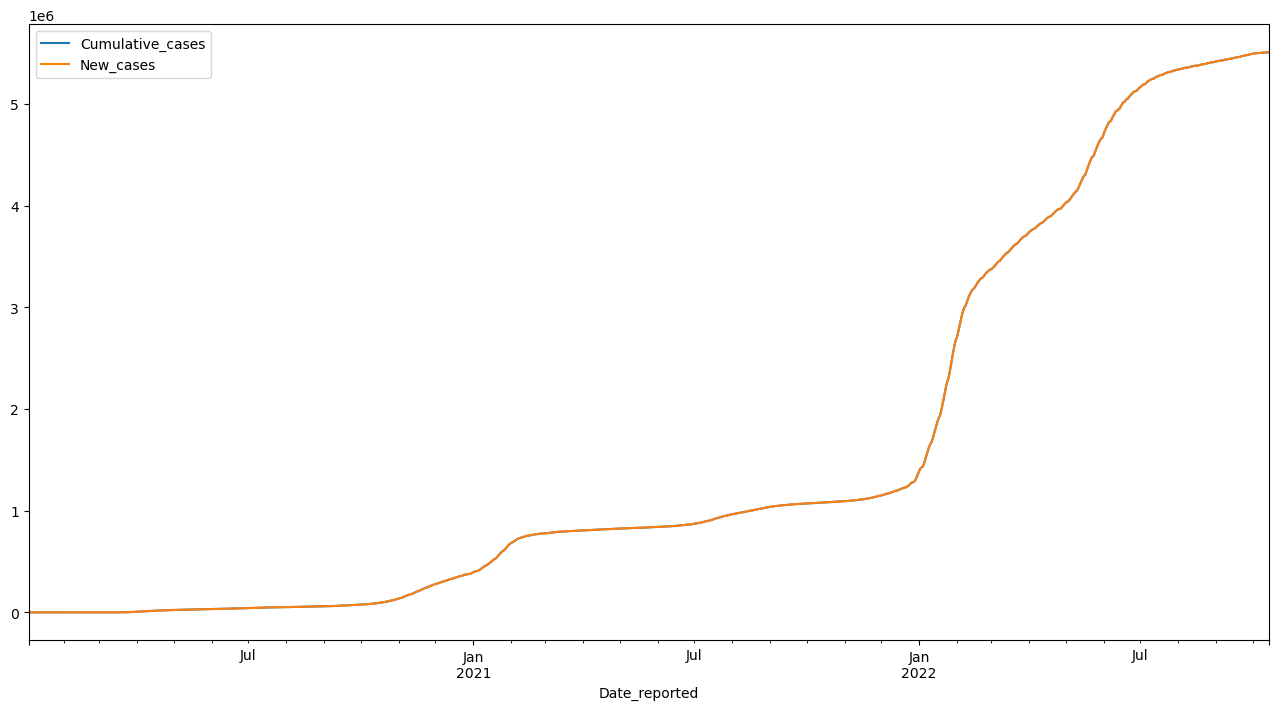

In [151]:
plt.figure(figsize=(16,8))

covid_pt['Cumulative_cases'].plot(legend=True)
covid_pt['New_cases'].expanding().sum().plot(legend=True)

# they are exact the same !

<AxesSubplot:title={'center':'the evolution of the cumulative average of cases by day'}, xlabel='Date_reported'>

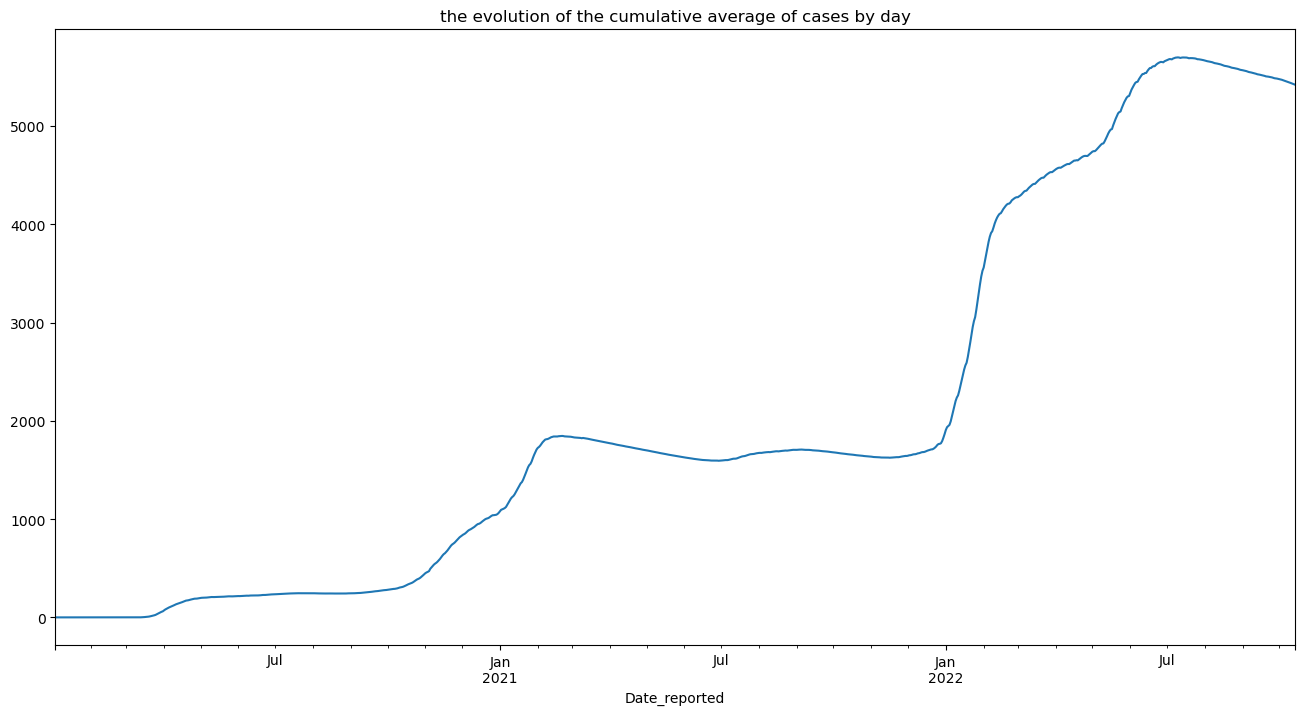

In [157]:
plt.figure(figsize=(16,8))

covid_pt['New_cases'].expanding().mean().plot(title='the evolution of the cumulative average of cases by day')